In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

In [3]:
evictions_data = pd.read_csv('Evictions.csv')

In [4]:
evictions_data.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,75924/17,15444,163-43 PHROANE AVENUE,2,09/04/2018,Edward,Guida,Residential,QUEENS,11433,Not an Ejectment,Possession,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica
1,54870/17,74389,25 EAST 193RD STREET,W21,04/05/2018,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",04/25/2017,Ileana,Rivera,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West
3,18327/19,355590,901 IRVINE STREET,"1,",09/16/2019,Thomas,Bia,Residential,BRONX,10474,Not an Ejectment,Possession,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point
4,38744/17,168490,100 BELLAMY LOOP,5A,02/22/2018,Alfred,Locascio,Residential,BRONX,10475,Not an Ejectment,Possession,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City


In [5]:
evictions_data.shape

(66402, 20)

1. Describe the data, its structure, data types, formats etc

In [6]:
evictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66402 entries, 0 to 66401
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Court Index Number         66402 non-null  object 
 1   Docket Number              66402 non-null  int64  
 2   Eviction Address           66402 non-null  object 
 3   Eviction Apartment Number  55419 non-null  object 
 4   Executed Date              66402 non-null  object 
 5   Marshal First Name         66402 non-null  object 
 6   Marshal Last Name          66402 non-null  object 
 7   Residential/Commercial     66402 non-null  object 
 8   BOROUGH                    66402 non-null  object 
 9   Eviction Postcode          66402 non-null  int64  
 10  Ejectment                  66402 non-null  object 
 11  Eviction/Legal Possession  66402 non-null  object 
 12  Latitude                   60088 non-null  float64
 13  Longitude                  60088 non-null  flo

2. Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

In [7]:
evictions_data['Executed Date'] = pd.to_datetime(evictions_data['Executed Date'])  

In [8]:
evictions_data["Executed Date"][1]

Timestamp('2018-04-05 00:00:00')

In [9]:
evictions_data2017 = evictions_data[(evictions_data['Executed Date'] >= "2017-01-01") & (evictions_data['Executed Date'] <= "2017-12-31")]

In [10]:
evictions_data2017.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
2,K54648/17,77852,1779 74TH STREET,"ONE ROOM, FIRST ROOM",2017-04-25,Ileana,Rivera,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.614423,-73.996060,11.0,43.0,264.0,3159059.0,3.062040e+09,Bensonhurst West
12,39210/17,69220,2630 KINGSBRIDGE TER RACE,5C,2017-10-17,Justin,Grossman,Residential,BRONX,10463,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,R 50085\17,68537,159 BENTLEY STREET,NaN,2017-05-23,Steven,Powell,Residential,STATEN ISLAND,10307,Not an Ejectment,Possession,40.508913,-74.249562,3.0,51.0,248.0,5089310.0,5.080490e+09,Charleston-Richmond Valley-Tottenville
21,51200/16,75676,92 SYLVIA ST. RIGHT SIDE APT.,NaN,2017-03-07,Kenneth,Giachetta,Residential,STATEN ISLAND,10312,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,B42860/17,81306,1871 LORING PLACE AK A 150 WEST BURNSIDE AVENUE,2-K,2017-12-19,Ileana,Rivera,Residential,BRONX,10453,Not an Ejectment,Possession,40.853234,-73.915303,5.0,14.0,24501.0,2009117.0,2.028790e+09,University Heights-Morris Heights


In [11]:
len(evictions_data2017)

22530

In [12]:
evictions_data2018 = evictions_data[(evictions_data['Executed Date'] >= "2018-01-01") & (evictions_data['Executed Date'] <= "2018-12-31")]

In [13]:
evictions_data2018.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,75924/17,15444,163-43 PHROANE AVENUE,2,2018-09-04,Edward,Guida,Residential,QUEENS,11433,Not an Ejectment,Possession,40.690359,-73.786320,12.0,27.0,264.0,4217170.0,4.102020e+09,South Jamaica
1,54870/17,74389,25 EAST 193RD STREET,W21,2018-04-05,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.866452,-73.897349,7.0,14.0,401.0,2014146.0,2.031910e+09,Bedford Park-Fordham North
4,38744/17,168490,100 BELLAMY LOOP,5A,2018-02-22,Alfred,Locascio,Residential,BRONX,10475,Not an Ejectment,Possession,40.872610,-73.825656,10.0,12.0,46201.0,2095398.0,2.051410e+09,Co-op City
5,32547/18,83012,1775 DAVIDSON AVENUE,6B,2018-12-18,Justin,Grossman,Residential,BRONX,10453,Not an Ejectment,Possession,40.848813,-73.912720,5.0,14.0,217.0,2008519.0,2.028670e+09,University Heights-Morris Heights
6,252678/17,341228,107-123 EAST 129TH STREET,3J,2018-03-07,Thomas,Bia,Residential,MANHATTAN,10035,Not an Ejectment,Possession,40.807315,-73.936482,11.0,9.0,242.0,1054510.0,1.017780e+09,East Harlem North


In [14]:
len(evictions_data2018)

21830

In [15]:
evictions_data2019 = evictions_data[(evictions_data['Executed Date'] >= "2019-01-01") & (evictions_data['Executed Date'] <= "2019-12-31")]

In [16]:
evictions_data2019.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
3,18327/19,355590,901 IRVINE STREET,"1,",2019-09-16,Thomas,Bia,Residential,BRONX,10474,Not an Ejectment,Possession,40.819644,-73.888790,2.0,17.0,11502.0,2006357.0,2.027610e+09,Hunts Point
15,B52219/18,110698,739 EAST 182ND ST,5B,2019-02-01,Darlene,Barone,Residential,BRONX,10457,Not an Ejectment,Possession,40.849734,-73.885476,6.0,15.0,393.0,2012778.0,2.030990e+09,Belmont
18,74748/18Q,92211,115-18 125TH STREET,1ST FLOOR,2019-03-25,Justin,Grossman,Residential,QUEENS,11416,Not an Ejectment,Possession,40.678020,-73.814109,10.0,28.0,176.0,4252177.0,4.116680e+09,South Ozone Park
22,065286/18,89825,97-28 57TH AVENUE,8J,2019-03-20,Henry,Daley,Residential,QUEENS,11368,Not an Ejectment,Possession,40.737453,-73.863040,4.0,21.0,455.0,4047320.0,4.019180e+09,Corona
31,32759/18,483297,2264 CRESTON AVENUE,5G,2019-01-07,Danny,Weinheim,Residential,BRONX,10453,Not an Ejectment,Possession,40.857115,-73.901315,5.0,14.0,23704.0,2013767.0,2.031630e+09,Fordham South


In [17]:
len(evictions_data2019)

18647

In [18]:
evictions_data2020 = evictions_data[(evictions_data['Executed Date'] >= "2020-01-01") & (evictions_data['Executed Date'] <= "2020-12-31")]

In [19]:
evictions_data2020.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
7,65542/19,25418,65-88 162ND STREET,5H,2020-01-06,Edward,Guida,Residential,QUEENS,11365,Not an Ejectment,Possession,40.734221,-73.806938,8.0,24.0,122701.0,4451578.0,4.067910e+09,Pomonok-Flushing Heights-Hillcrest
95,69898/19,358402,127 EAST 107TH STREET,703,2020-02-13,Thomas,Bia,Residential,MANHATTAN,10029,Not an Ejectment,Possession,40.793174,-73.946366,11.0,8.0,172.0,1088453.0,1.016350e+09,East Harlem South
119,35484/19,494073,184 MT. EDEN PARKWAY,UNIT 1D,2020-01-02,Danny,Weinheim,Residential,BRONX,10457,Not an Ejectment,Possession,40.842943,-73.910173,4.0,16.0,225.0,2007828.0,2.028200e+09,East Concourse-Concourse Village
132,66413/19,102972,14-34 110TH STREET SPA/OFFICE - SUITES 302 & 304,NaN,2020-02-19,Henry,Daley,Commercial,QUEENS,11356,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,74214/19,209408,515 WEST 38TH STREET,29E,2020-03-03,Richard,Capuano,Residential,MANHATTAN,10018,Not an Ejectment,Possession,40.757461,-73.998105,4.0,3.0,117.0,1090727.0,1.007108e+09,Hudson Yards-Chelsea-Flatiron-Union Square


In [20]:
len(evictions_data2020)

3387

In [21]:
evictions_data2021 = evictions_data[(evictions_data['Executed Date'] >= "2021-01-01") & (evictions_data['Executed Date'] <= "2021-12-31")]

In [22]:
evictions_data2021.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
4578,71338/19,103189,14 DURYEA PLACE THE RETAIL COMMERCIAL RESTAURA...,NaN,2021-01-04,Henry,Daley,Commercial,BROOKLYN,11226,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,79035/19,106064,2253 STRAUSS STRE ET A/K/A 47 NEWPORT STREET,STOREFRONT,2021-02-09,Justin,Grossman,Commercial,BROOKLYN,11212,Not an Ejectment,Possession,40.658878,-73.913787,16.0,42.0,896.0,3082249.0,3.035970e+09,Brownsville
19787,901310/19,358618,117 ROCKWOOD STREET,FIRST,2021-01-11,Thomas,Bia,Commercial,BRONX,10452,Not an Ejectment,Possession,40.841944,-73.913260,4.0,14.0,209.0,2008013.0,2.028360e+09,West Concourse
39365,55269/20,13639,66-31 OTTO ROAD,NaN,2021-01-12,Robert,Renzulli,Commercial,QUEENS,11385,Not an Ejectment,Possession,40.705458,-73.889294,5.0,30.0,61301.0,4089237.0,4.036671e+09,Ridgewood
39625,80034/19,63586,2118 AVENUE U,STORE,2021-01-04,Howard,Schain,Commercial,BROOKLYN,11229,Not an Ejectment,Possession,40.599516,-73.950115,15.0,48.0,578.0,3199836.0,3.073540e+09,Madison


In [23]:
len(evictions_data2021)

7

The evictions data from NYC OpenData starts from 2017. In 2017 the number of evictions was 22530. In 2018 the number of evictions was 21830. In 2019 the number of evictions was 18647. In 2020 the number of evictions was 3387. In 2021 we only have data from Januray and the number of evictions was 7. The general thread of the evictions data is that every year the number of evictions decrease. The year that had the largest number of eviction was 2017. The month that has the smallest number of eviction is 2021. My main assumption was that during the years that covid was at it's peak 2019 and 2020 would have drasticaly low eviction numbers because of certain tentant laws and my assumpution does fit the data. 

3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.

In [24]:
whole_commercial = evictions_data[evictions_data["Residential/Commercial"] == "Commercial"]
whole_residential = evictions_data[evictions_data["Residential/Commercial"] == "Residential"]
print(len(whole_commercial))
print(len(whole_residential))
print(len(whole_commercial)/len(whole_residential))

5593
60809
0.09197651663405088


In [25]:
commercial2017 = evictions_data2017[evictions_data2017["Residential/Commercial"] == "Commercial"]
residential2017 = evictions_data2017[evictions_data2017["Residential/Commercial"] == "Residential"]
print(len(commercial2017))
print(len(residential2017))
print(len(commercial2017)/len(residential2017))

1720
20810
0.0826525708793849


In [26]:
commercial2018 = evictions_data2018[evictions_data2018["Residential/Commercial"] == "Commercial"]
residential2018 = evictions_data2018[evictions_data2018["Residential/Commercial"] == "Residential"]
print(len(commercial2018))
print(len(residential2017))
print(len(commercial2018)/len(residential2018))

1842
20810
0.09215529317590554


In [27]:
commercial2019 = evictions_data2019[evictions_data2019["Residential/Commercial"] == "Commercial"]
residential2019 = evictions_data2019[evictions_data2019["Residential/Commercial"] == "Residential"]
print(len(commercial2019))
print(len(residential2019))
print(len(commercial2019)/len(residential2019))

1672
16975
0.09849779086892489


In [28]:
commercial2020 = evictions_data2020[evictions_data2020["Residential/Commercial"] == "Commercial"]
residential2020 = evictions_data2020[evictions_data2020["Residential/Commercial"] == "Residential"]
print(len(commercial2020))
print(len(residential2020))
print(len(commercial2020)/len(residential2020)) 

352
3035
0.11598023064250412


In [29]:
commercial2021 = evictions_data2021[evictions_data2021["Residential/Commercial"] == "Commercial"]
residential2021 = evictions_data2021[evictions_data2021["Residential/Commercial"] == "Residential"]
print(len(commercial2021))
print(len(residential2021))
#print(len(commercial2021)/len(residential2021)) # ZeroDivisionError: division by zero

7
0


4. What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?


In [30]:
evictions_data["Marshal Last Name"].value_counts()

Grossman       9173
Daley          6487
Rivera         5842
Bia            5560
Guida          5422
Weinheim       5350
McCoy          4023
Barone         3730
Essock, Jr.    2661
Renzulli       2403
Capuano        1870
Chevlowe       1870
Rose           1702
Locascio       1425
Essock         1417
Pazant         1337
Villanueva      822
Barbarovich     804
Giachetta       771
Powell          757
Schain          713
Siracusa        551
Blake           446
Marchisotto     394
Giglio          388
Kemp            366
Solimine        118
Name: Marshal Last Name, dtype: int64

In [31]:
evictions_data[evictions_data["Marshal Last Name"] == "Grossman"]["Marshal First Name"][:1]

1    Justin
Name: Marshal First Name, dtype: object

In [32]:
evictions_data[evictions_data["Marshal Last Name"] == "Daley"]["Marshal First Name"][:1]

17    Henry
Name: Marshal First Name, dtype: object

In [33]:
evictions_data[evictions_data["Marshal Last Name"] == "Rivera"]["Marshal First Name"][:1]

2    Ileana
Name: Marshal First Name, dtype: object

In [34]:
evictions_data[evictions_data["Marshal Last Name"] == "Bia"]["Marshal First Name"][:1]

3    Thomas
Name: Marshal First Name, dtype: object

In [35]:
evictions_data[evictions_data["Marshal Last Name"] == "Guida"]["Marshal First Name"][:1]

0    Edward
Name: Marshal First Name, dtype: object

The top 5 eviction marshals are Justin Grossman, Henry Daley, Ileana Rivera, Thomas Bia, Edward Guida.

5. How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.


In [36]:
queens_data = evictions_data[evictions_data["BOROUGH"] == "QUEENS"]
bronx_data = evictions_data[evictions_data["BOROUGH"] == "BRONX"]
brook_data = evictions_data[evictions_data["BOROUGH"] == "BROOKLYN"]
man_data = evictions_data[evictions_data["BOROUGH"] == "MANHATTAN"]
si_data = evictions_data[evictions_data["BOROUGH"] == "STATEN ISLAND"]

In [37]:
print("QUEENS:")
print("The number of evictions in 2017:", len(queens_data[(queens_data['Executed Date'] >= "2017-01-01") & (queens_data['Executed Date'] <= "2017-12-31")]), " The population in 2017: 2,295,810")
print("The number of evictions in 2018:", len(queens_data[(queens_data['Executed Date'] >= "2018-01-01") & (queens_data['Executed Date'] <= "2018-12-31")]), " The population in 2018: 2,274,600")
print("The number of evictions in 2019:", len(queens_data[(queens_data['Executed Date'] >= "2019-01-01") & (queens_data['Executed Date'] <= "2019-12-31")]), " The population in 2019: 2,253,860")
print("The number of evictions in 2020:", len(queens_data[(queens_data['Executed Date'] >= "2020-01-01") & (queens_data['Executed Date'] <= "2020-12-31")]), " The population in 2020: 2,233,110")
print("The number of evictions in 2021:", len(queens_data[(queens_data['Executed Date'] >= "2021-01-01") & (queens_data['Executed Date'] <= "2021-12-31")]), " The population in 2021: 2,212,360")

QUEENS:
The number of evictions in 2017: 4325  The population in 2017: 2,295,810
The number of evictions in 2018: 4452  The population in 2018: 2,274,600
The number of evictions in 2019: 3705  The population in 2019: 2,253,860
The number of evictions in 2020: 693  The population in 2020: 2,233,110
The number of evictions in 2021: 2  The population in 2021: 2,212,360


In [38]:
print("BRONX:")
print("The number of evictions in 2017:", len(bronx_data[(bronx_data['Executed Date'] >= "2017-01-01") & (bronx_data['Executed Date'] <= "2017-12-31")]), " The population in 2017: 1,440,620")
print("The number of evictions in 2018:", len(bronx_data[(bronx_data['Executed Date'] >= "2018-01-01") & (bronx_data['Executed Date'] <= "2018-12-31")]), " The population in 2018: 1,432,090")
print("The number of evictions in 2019:", len(bronx_data[(bronx_data['Executed Date'] >= "2019-01-01") & (bronx_data['Executed Date'] <= "2019-12-31")]), " The population in 2019: 1,418,210")
print("The number of evictions in 2020:", len(bronx_data[(bronx_data['Executed Date'] >= "2020-01-01") & (bronx_data['Executed Date'] <= "2020-12-31")]), " The population in 2020: 1,404,330")
print("The number of evictions in 2021:", len(bronx_data[(bronx_data['Executed Date'] >= "2021-01-01") & (bronx_data['Executed Date'] <= "2021-12-31")]), " The population in 2021: 1,390,450")

BRONX:
The number of evictions in 2017: 7662  The population in 2017: 1,440,620
The number of evictions in 2018: 7140  The population in 2018: 1,432,090
The number of evictions in 2019: 6188  The population in 2019: 1,418,210
The number of evictions in 2020: 1061  The population in 2020: 1,404,330
The number of evictions in 2021: 1  The population in 2021: 1,390,450


In [39]:
print("BROOKLYN:")
print("The number of evictions in 2017:", len(brook_data[(brook_data['Executed Date'] >= "2017-01-01") & (brook_data['Executed Date'] <= "2017-12-31")]), " The population in 2017: 2,635,000")
print("The number of evictions in 2018:", len(brook_data[(brook_data['Executed Date'] >= "2018-01-01") & (brook_data['Executed Date'] <= "2018-12-31")]), " The population in 2018: 2,601,000")
print("The number of evictions in 2019:", len(brook_data[(brook_data['Executed Date'] >= "2019-01-01") & (brook_data['Executed Date'] <= "2019-12-31")]), " The population in 2019: 2,590,000")
print("The number of evictions in 2020:", len(brook_data[(brook_data['Executed Date'] >= "2020-01-01") & (brook_data['Executed Date'] <= "2020-12-31")]), " The population in 2020: 2,589,970")
print("The number of evictions in 2021:", len(brook_data[(brook_data['Executed Date'] >= "2021-01-01") & (brook_data['Executed Date'] <= "2021-12-31")]), " The population in 2021: 2,589,970")

BROOKLYN:
The number of evictions in 2017: 6357  The population in 2017: 2,635,000
The number of evictions in 2018: 6157  The population in 2018: 2,601,000
The number of evictions in 2019: 5312  The population in 2019: 2,590,000
The number of evictions in 2020: 1003  The population in 2020: 2,589,970
The number of evictions in 2021: 3  The population in 2021: 2,589,970


In [40]:
print("MANHATTAN:")
print("The number of evictions in 2017:", len(man_data[(man_data['Executed Date'] >= "2017-01-01") & (man_data['Executed Date'] <= "2017-12-31")]), " The population in 2017: 1,654,000")
print("The number of evictions in 2018:", len(man_data[(man_data['Executed Date'] >= "2018-01-01") & (man_data['Executed Date'] <= "2018-12-31")]), " The population in 2018: 1,632,000")
print("The number of evictions in 2019:", len(man_data[(man_data['Executed Date'] >= "2019-01-01") & (man_data['Executed Date'] <= "2019-12-31")]), " The population in 2019: 1,632,000")
print("The number of evictions in 2020:", len(man_data[(man_data['Executed Date'] >= "2020-01-01") & (man_data['Executed Date'] <= "2020-12-31")]), " The population in 2020: 1,632,000")
print("The number of evictions in 2021:", len(man_data[(man_data['Executed Date'] >= "2021-01-01") & (man_data['Executed Date'] <= "2021-12-31")]), " The population in 2021: 1,631,000")

MANHATTAN:
The number of evictions in 2017: 3452  The population in 2017: 1,654,000
The number of evictions in 2018: 3390  The population in 2018: 1,632,000
The number of evictions in 2019: 2806  The population in 2019: 1,632,000
The number of evictions in 2020: 518  The population in 2020: 1,632,000
The number of evictions in 2021: 1  The population in 2021: 1,631,000


In [41]:
print("STATEN ISLAND:")
print("The number of evictions in 2017:", len(man_data[(man_data['Executed Date'] >= "2017-01-01") & (man_data['Executed Date'] <= "2017-12-31")]), " The population in 2017: 475,948")
print("The number of evictions in 2018:", len(man_data[(man_data['Executed Date'] >= "2018-01-01") & (man_data['Executed Date'] <= "2018-12-31")]), " The population in 2018: 474,101")
print("The number of evictions in 2019:", len(man_data[(man_data['Executed Date'] >= "2019-01-01") & (man_data['Executed Date'] <= "2019-12-31")]), " The population in 2019: 474,893")
print("The number of evictions in 2020:", len(man_data[(man_data['Executed Date'] >= "2020-01-01") & (man_data['Executed Date'] <= "2020-12-31")]), " The population in 2020: 474,893")
print("The number of evictions in 2021:", len(man_data[(man_data['Executed Date'] >= "2021-01-01") & (man_data['Executed Date'] <= "2021-12-31")]), " The population in 2021: 474,893")

STATEN ISLAND:
The number of evictions in 2017: 3452  The population in 2017: 475,948
The number of evictions in 2018: 3390  The population in 2018: 474,101
The number of evictions in 2019: 2806  The population in 2019: 474,893
The number of evictions in 2020: 518  The population in 2020: 474,893
The number of evictions in 2021: 1  The population in 2021: 474,893


6. Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.

In [42]:
nta = gpd.read_file('nta')
print(len(nta))

195


In [43]:
nta.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


In [44]:
nta.shape

(195, 8)

In [45]:
ntaNames = []
for i in range(len(nta.NTAName)):
    ntaNames.append(nta.NTAName.iloc[i])
print(len(ntaNames))

195


In [46]:
ntaNumbers = []
for i in range(len(ntaNames)):
    ntaNumbers.append(len(evictions_data[(evictions_data['NTA'] == ntaNames[i])]))
print(len(ntaNumbers))                

195


In [47]:
evictions_nta = pd.DataFrame(ntaNames, columns = ['NTA'])
evictions_nta["Amount"] = ntaNumbers
evictions_nta.head()

,NTA,Amount
0,Borough Park,181
1,Murray Hill,177
2,East Elmhurst,96
3,Hollis,218
4,Homecrest,162


In [48]:
nta['NTA'] = nta['NTAName'] 
nta = nta.merge(evictions_nta, on = "NTA")
nta.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NTA,Amount
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",Borough Park,181
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ...",Murray Hill,177
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ...",East Elmhurst,96
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ...",Hollis,218
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",Homecrest,162


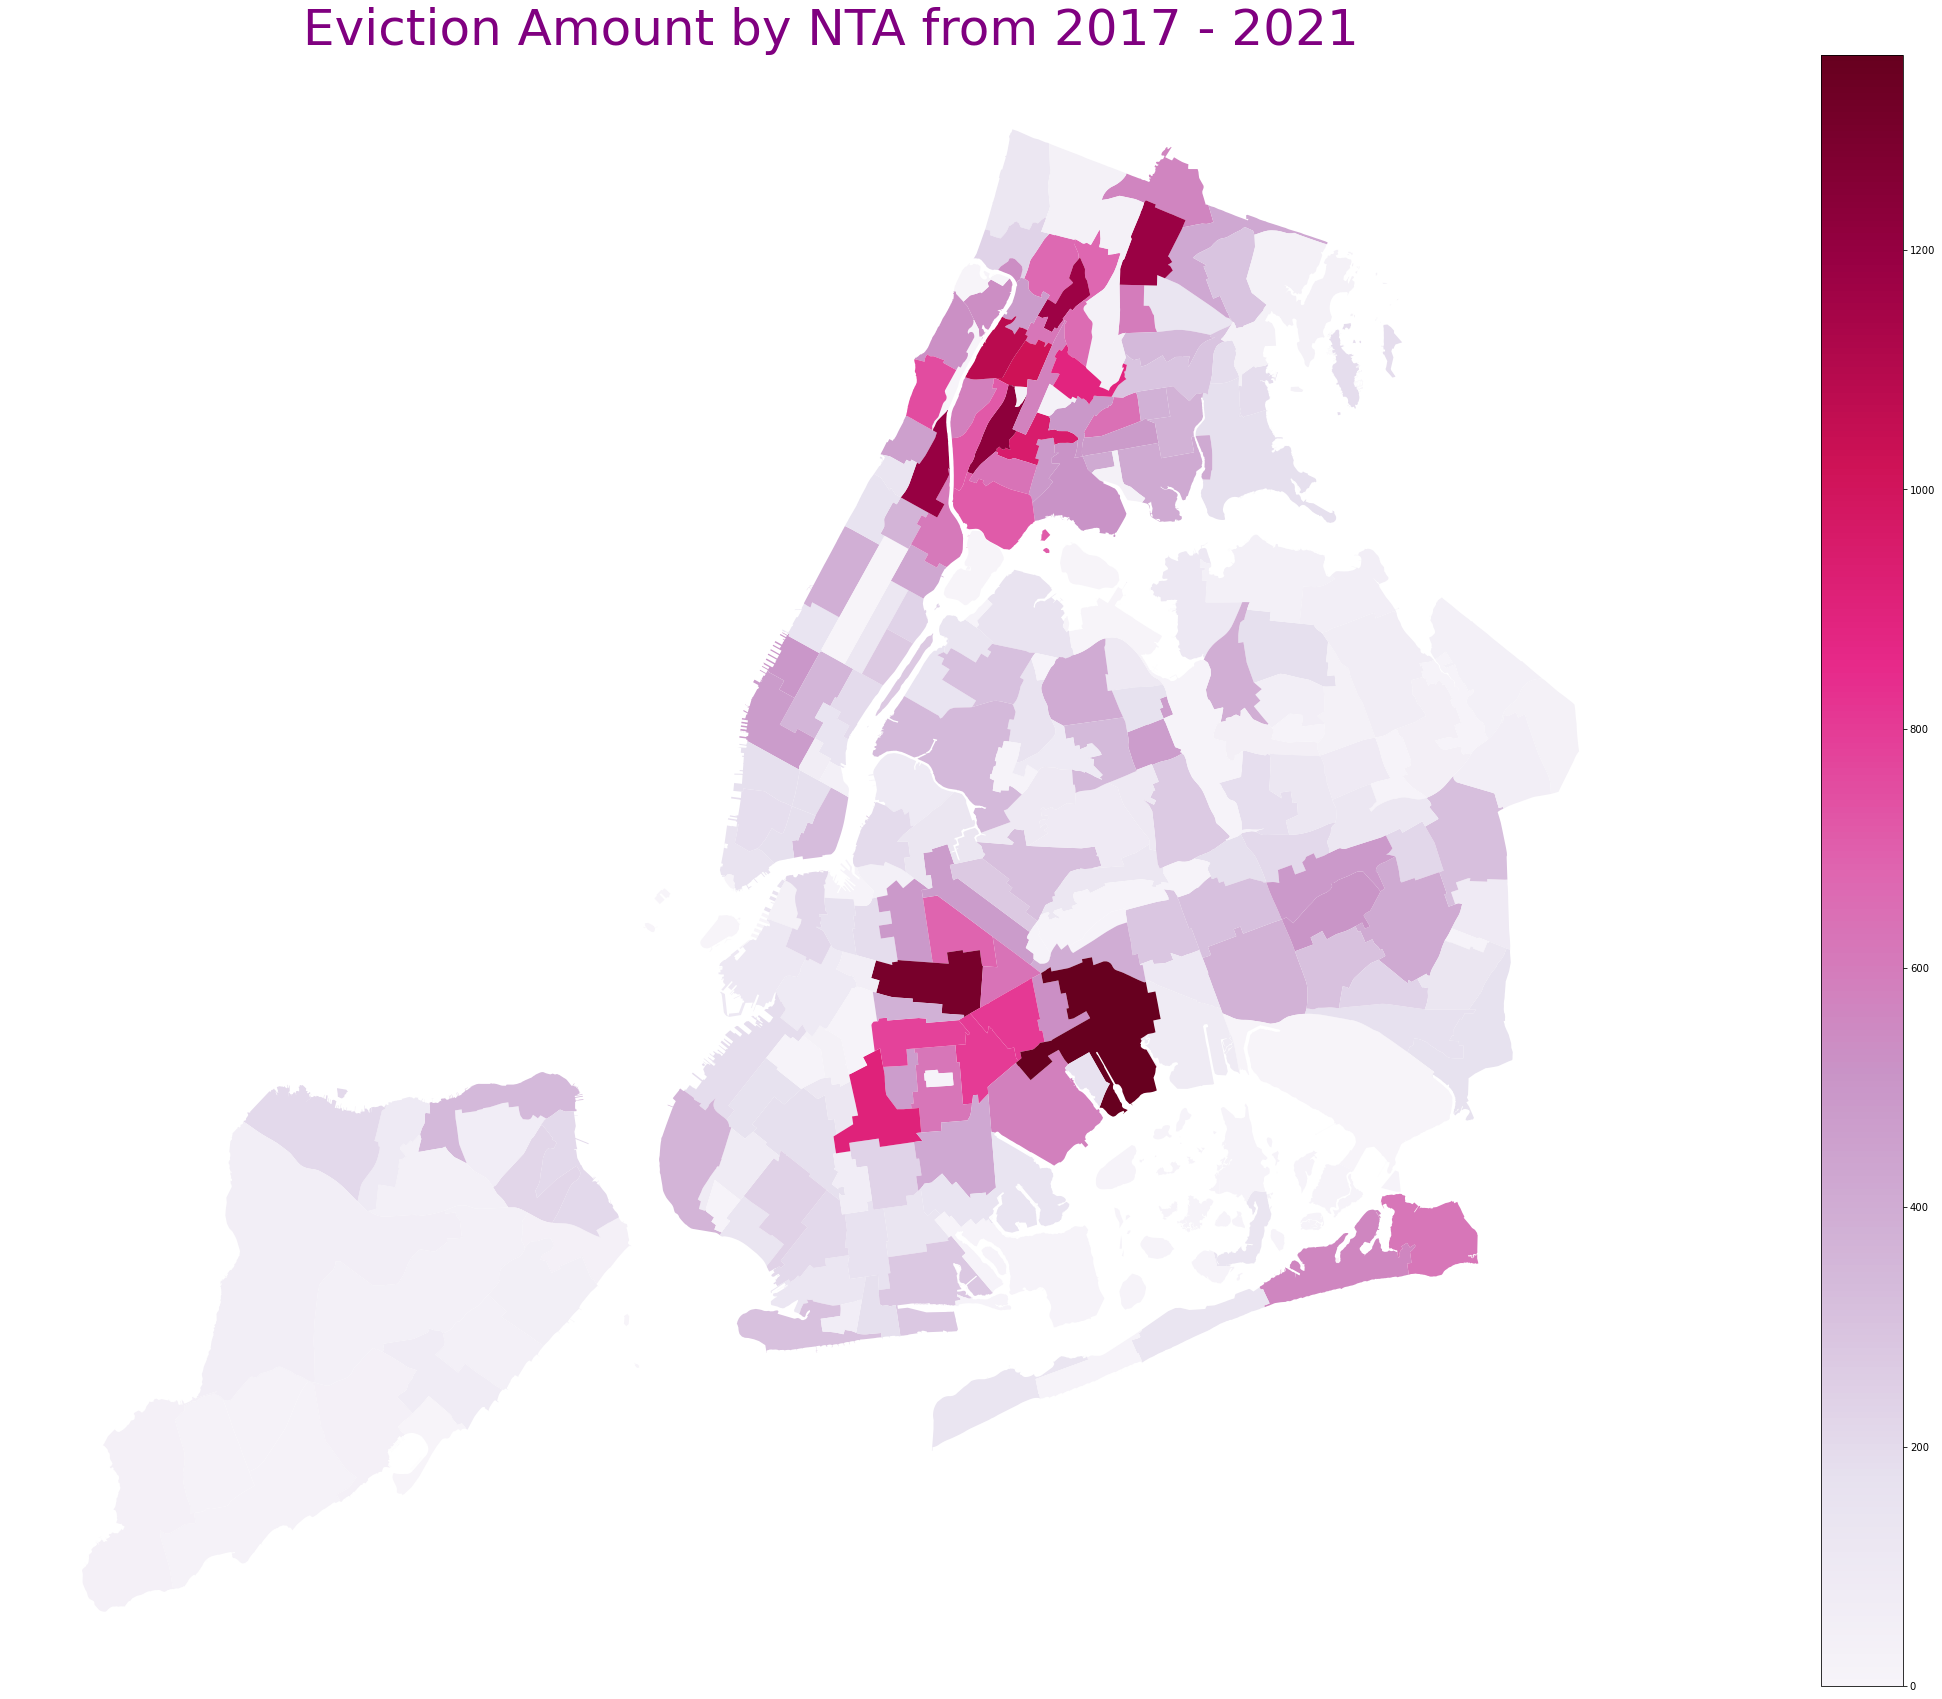

In [49]:
nta.plot(column = 'Amount', legend=True, figsize=(60, 30),cmap='PuRd')
plt.axis('off')
plt.title('Eviction Amount by NTA from 2017 - 2021', fontsize=50, color ='purple')
plt.show()

7. Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections.

https://geodacenter.github.io/data-and-lab/NYC-Nhood-ACS-2008-12/


In [50]:
nycnhood = gpd.read_file('nycnhood_acs')

In [51]:
nycnhood.shape

(195, 99)

In [64]:
new_frame = nycnhood["poororstru"].sort_values(ascending=False)
new_frame.head()

58     63836
30     51994
2      49800
126    49086
170    48779
Name: poororstru, dtype: int64

In [65]:
new_frame = nycnhood["poor"].sort_values(ascending=False)
new_frame.head()

58     36334
30     30471
2      28565
126    24389
170    23628
Name: poor, dtype: int64

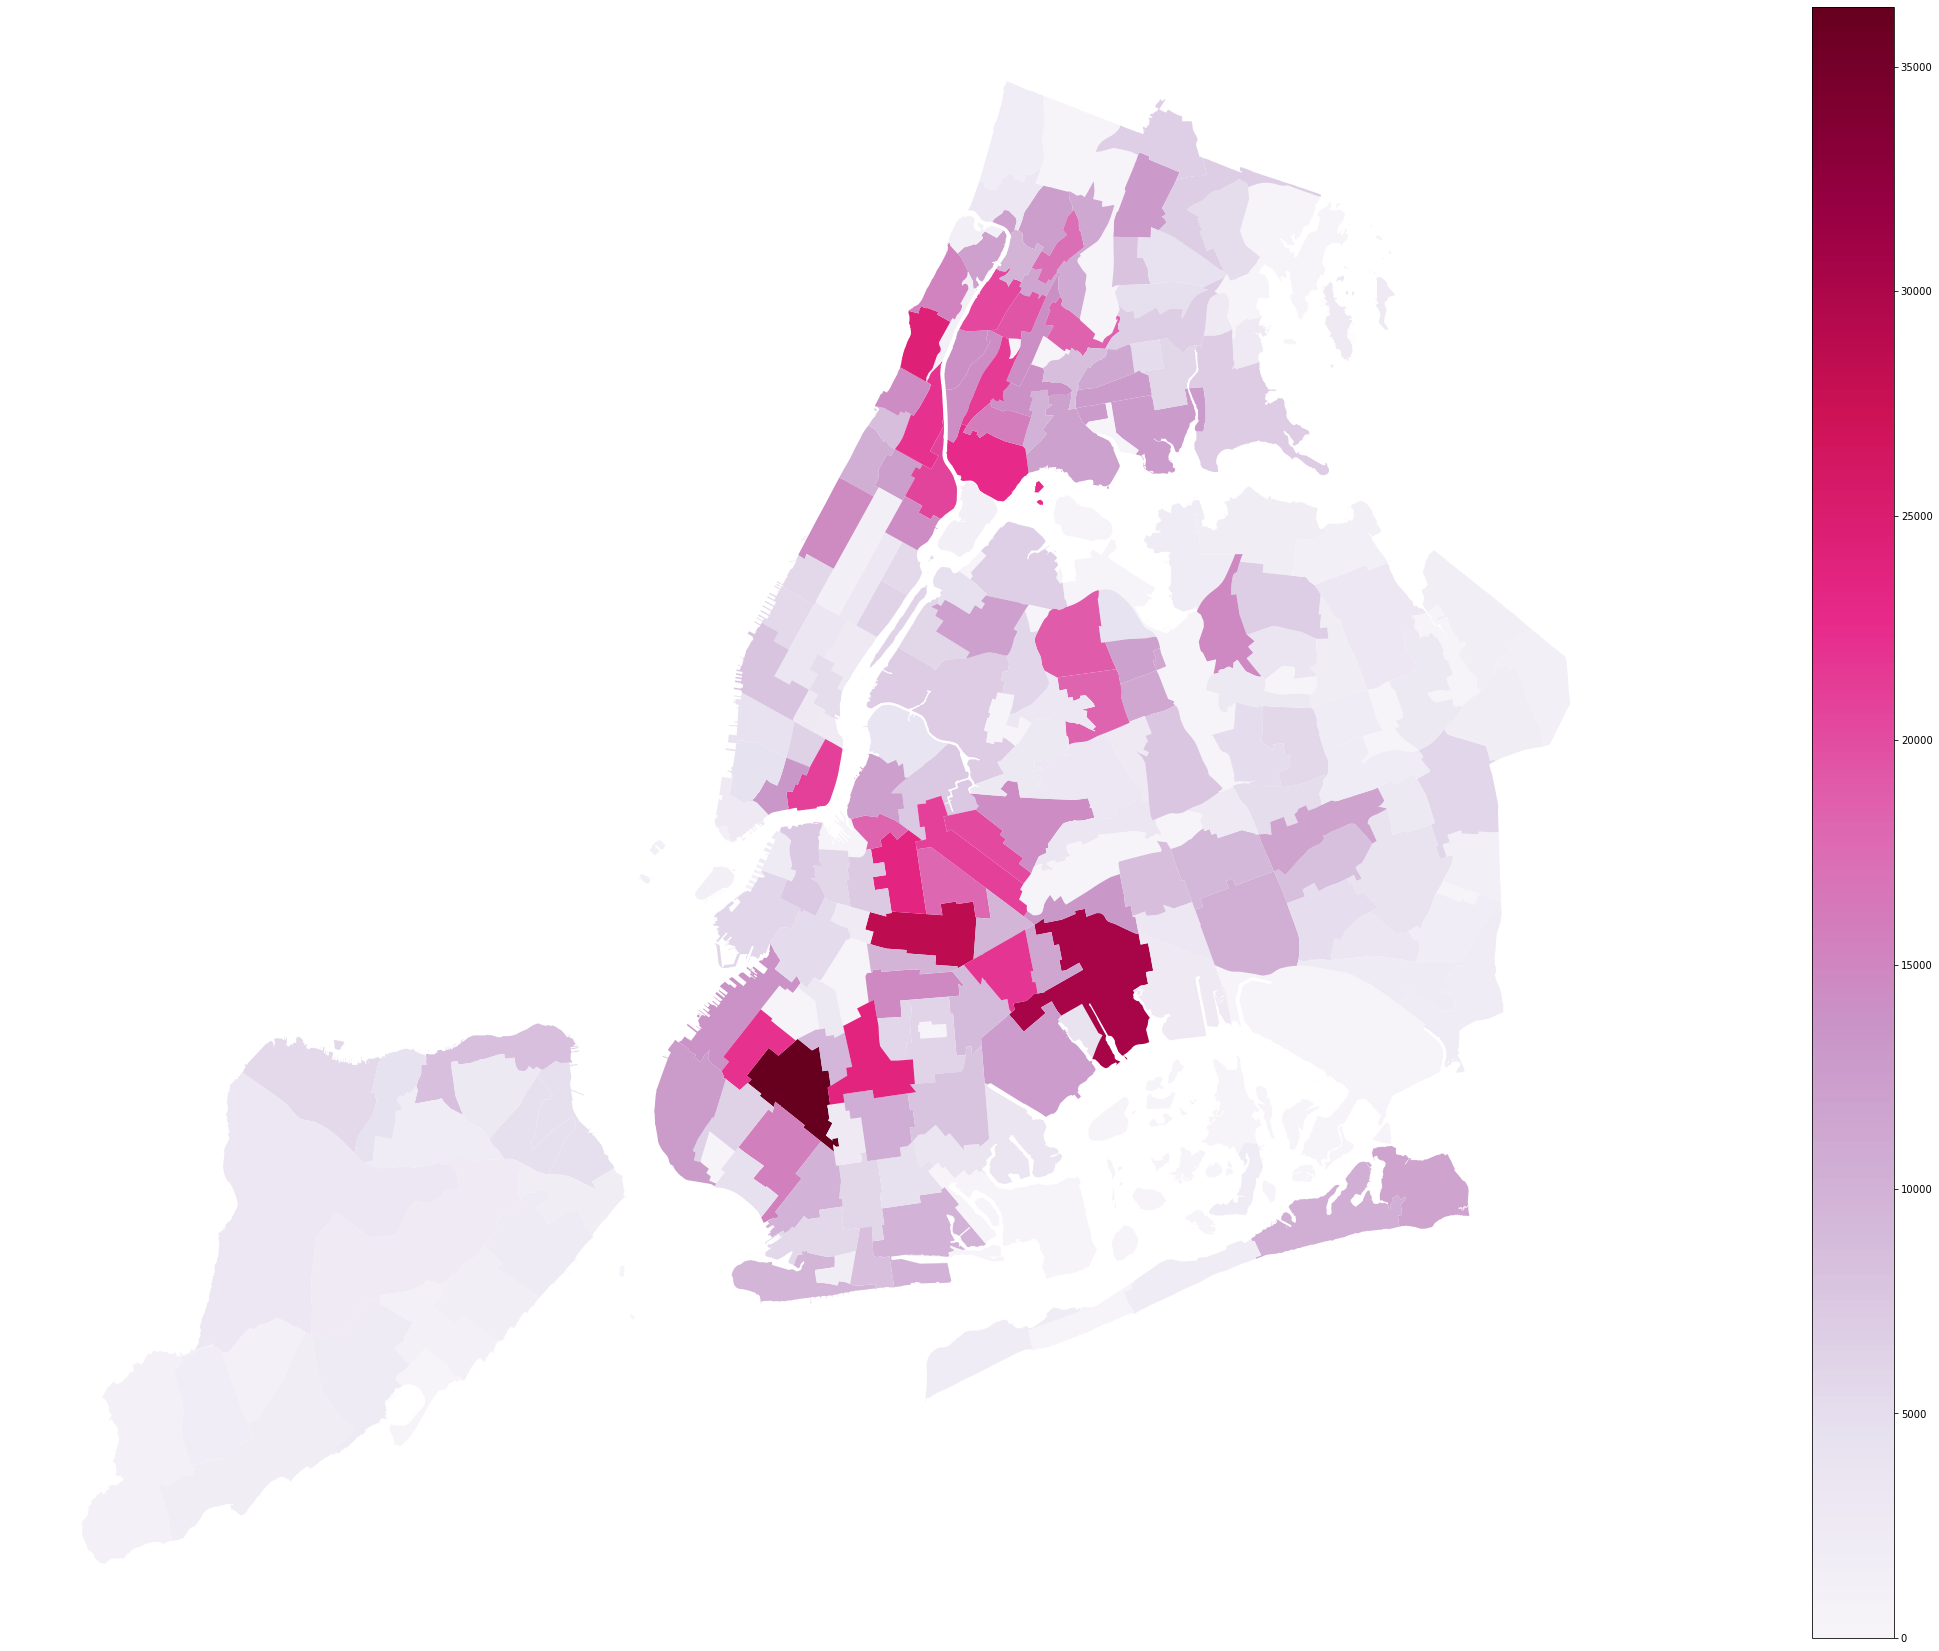

In [66]:
nycnhood.plot(column = 'poor', legend=True, figsize=(60, 30),cmap='PuRd')
plt.axis('off')
plt.title('', fontsize=50, color ='purple')
plt.show()

Text(0.5, 0.98, 'Eviction Amount by NTA from 2017 - 2021 vs Other Other by Other Other')

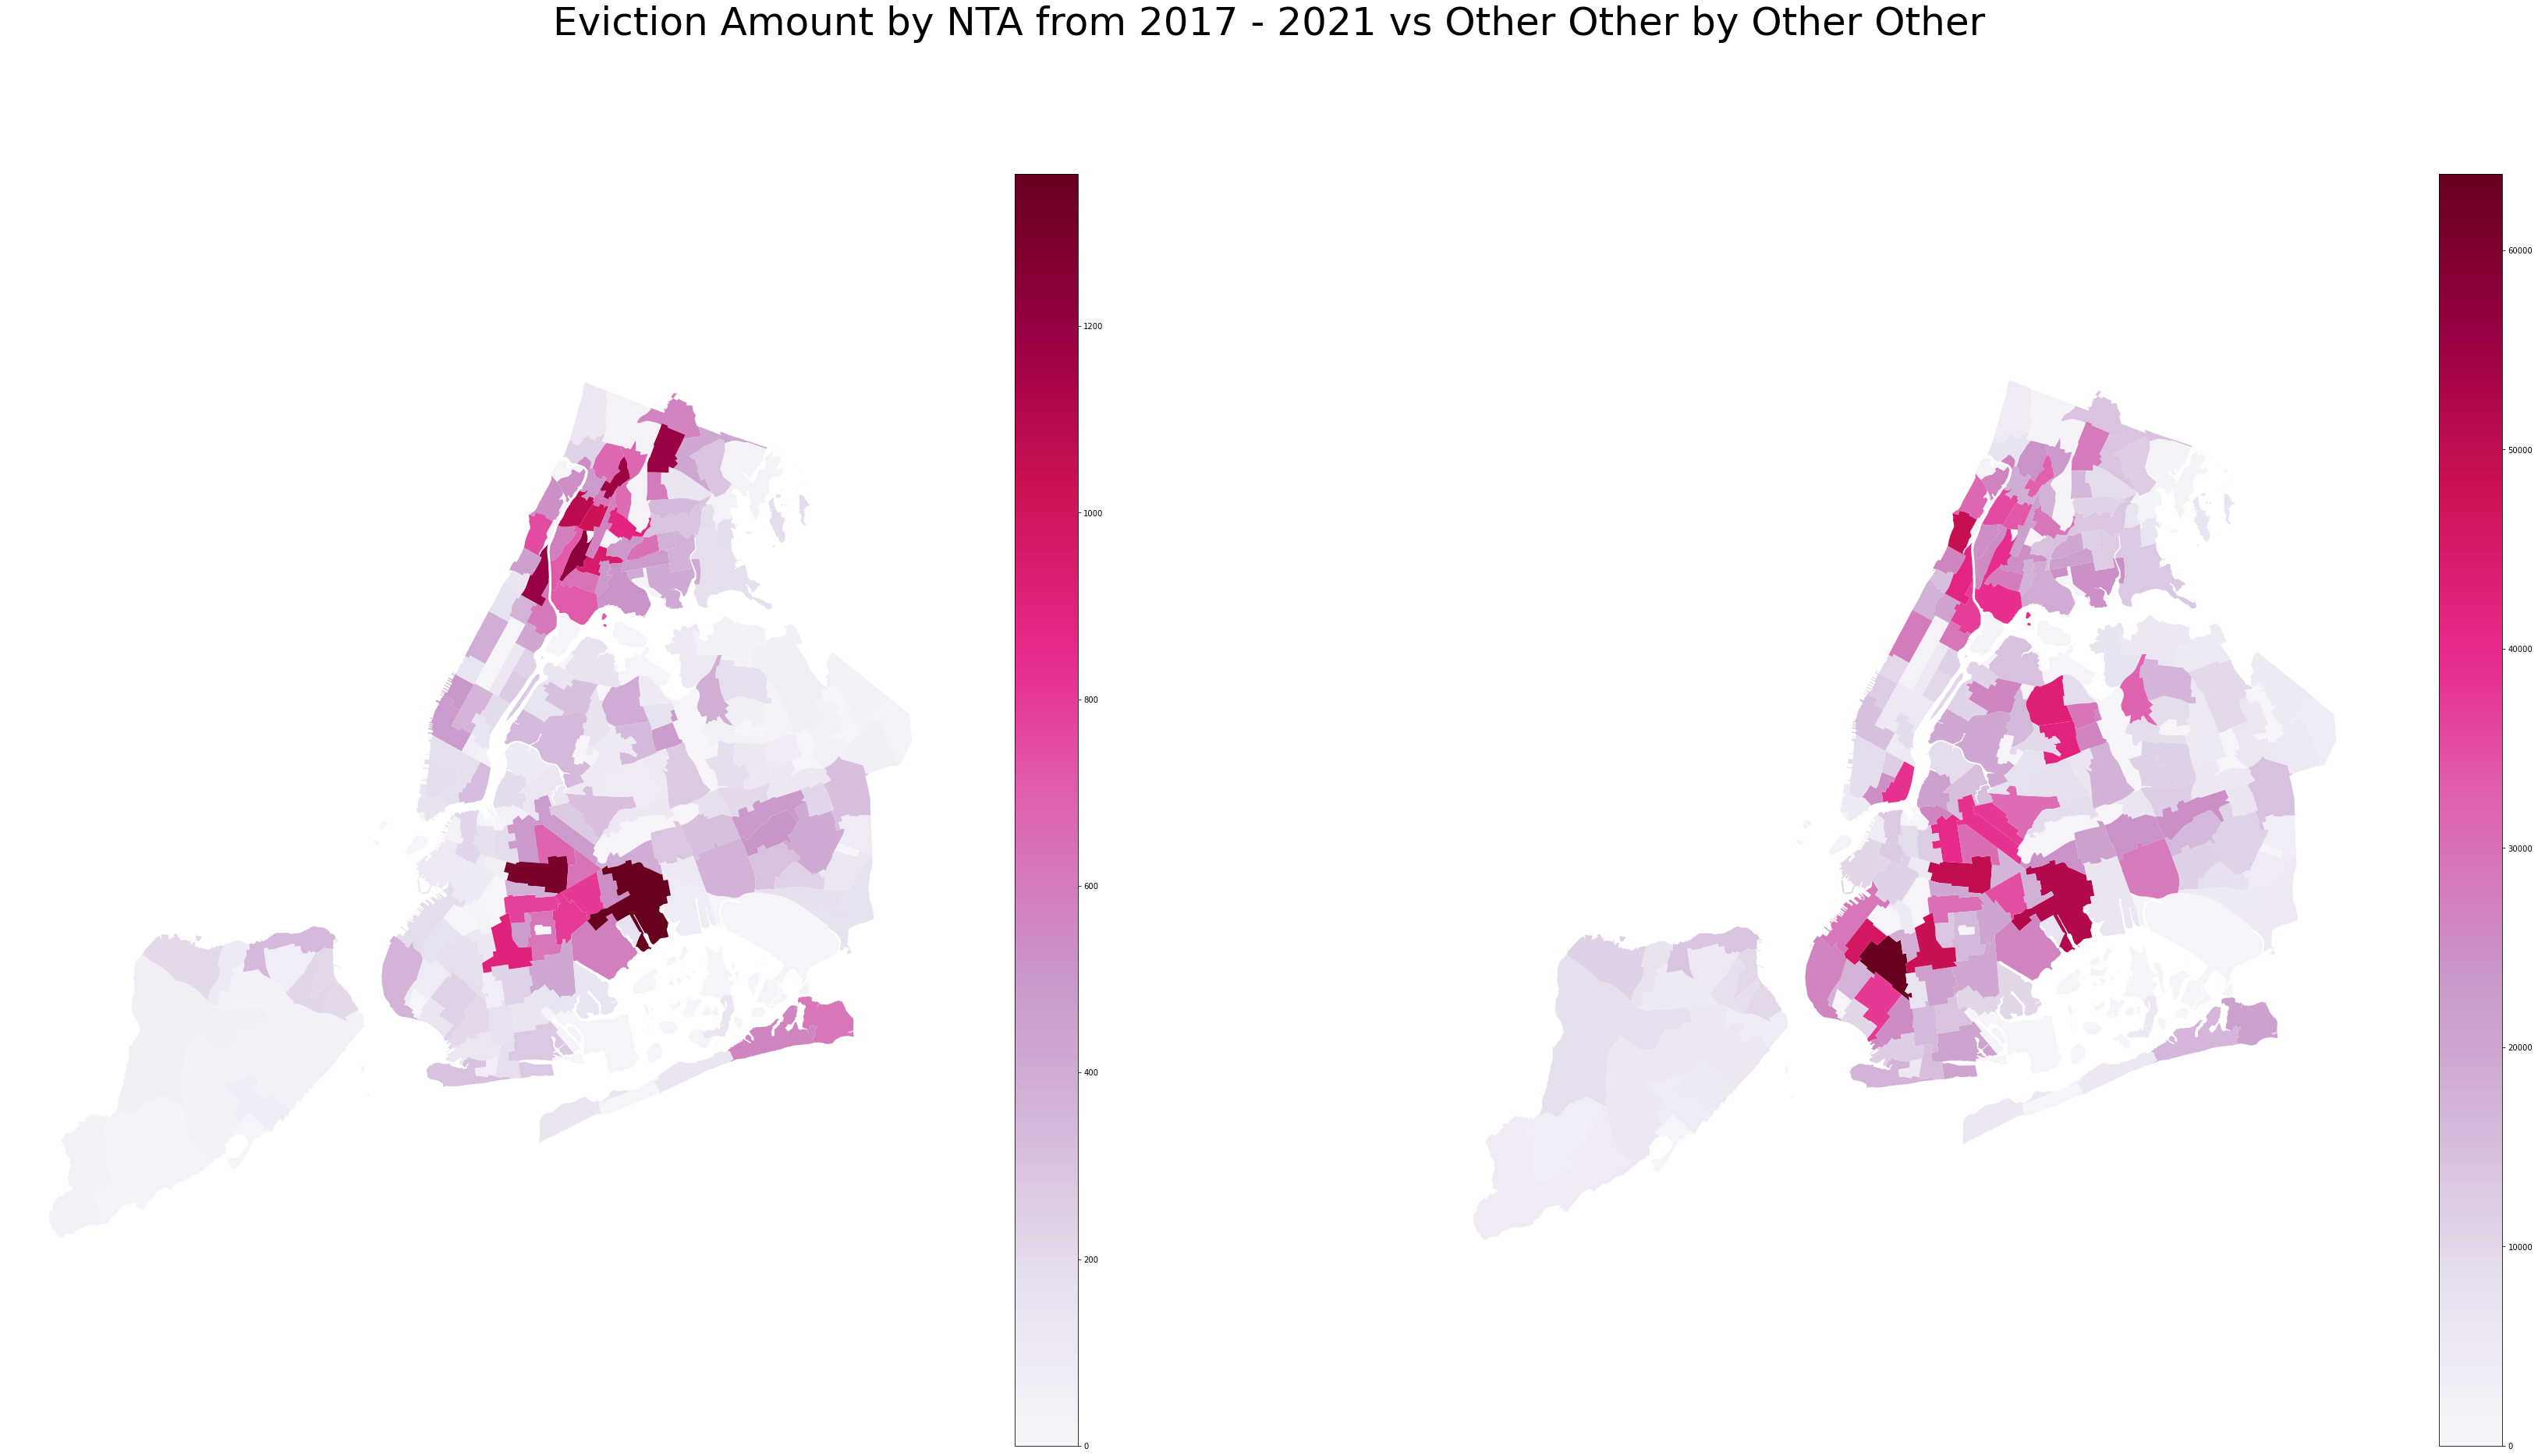

In [59]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(60, 30))
ax1 = nta.plot(ax = ax1, column = 'Amount', legend=True, cmap='PuRd')
ax1.axis('off')
ax2 = nycnhood.plot(ax = ax2, column = 'poor', legend=True,cmap='PuRd')
ax2.axis('off')
fig.suptitle('Eviction Amount by NTA from 2017 - 2021 vs House hold income less than 65k to  ', fontsize = 50)